In [322]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [346]:
scale = 1.5
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('axes', titlesize=12*scale)
plt.rc('xtick', labelsize=8*scale)
plt.rc('ytick', labelsize=8*scale)
plt.rc('axes', labelsize=10*scale)
plot_width = 3.487 * scale
plot_height = plot_width / 1.618

In [385]:
clean = np.array([np.sin(x) for x in np.arange(0,15,0.2)])
dirty = np.random.normal(0, 1, size=len(clean)) + clean
print(len(clean))

75


In [386]:
from statsmodels.tsa.ar_model import AR
t_size = 30
model = AR(clean[:-t_size])
model_fitted = model.fit()
clean_predictions = model_fitted.predict(
    start=len(clean)-t_size, 
    end=len(clean)-1, 
    dynamic=False)
model = AR(dirty[:-t_size])
model_fitted = model.fit()
dirty_predictions = model_fitted.predict(
    start=len(dirty)-t_size, 
    end=len(dirty)-1, 
    dynamic=False)

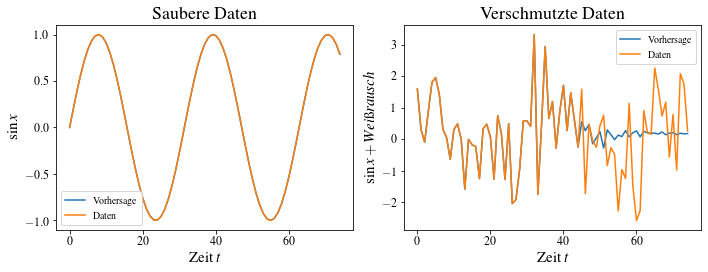

In [387]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("ar_sauber_verschmutze_daten.pdf")

In [388]:
dif = clean-dirty
model = AR(dif[:-t_size])
model_fitted = model.fit()
dif_predictions = model_fitted.predict(
    start=len(dif)-t_size, 
    end=len(dif)-1, 
    dynamic=False)

In [389]:
dirty_predictions[-t_size:] = dirty[-t_size:] + dif_predictions

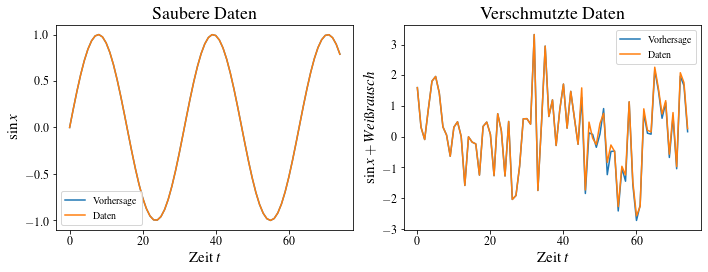

In [390]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("arx_sauber_verschmutze_daten.pdf")